<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-03/Ejemplo-02/graficas_de_barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 2: Gráficas de barras

### 1. Objetivos:
    - Aprender a realizar gráficas de barras con frecuencias y porcentajes

---
    
### 2. Desarrollo:

In [141]:
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [142]:
path1= "https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/raw/master/"
df = pd.read_json(path1 + 'Datasets/zomato_reviews-clean.json')

df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


En este dataset tenemos una variable llamada 'user_rating' que es categórica. Para saber si es categórica podemos primero revisar con el método `unique` para ver todos los valores únicos contenidos en esa columna:

In [143]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [144]:
df['user_rating'].nunique()

6

`nunique` nos da el número de categorías que tenemos.

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso `pandas` nos ofrece un método llamado `value_counts`:

In [145]:
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

El método nos regresa una `Serie` con los nombres de la categorías como índices y los conteos como valores. Esta tabla la podemos usar para generar nuestra gráfica:

In [146]:
counts = df['user_rating'].value_counts()

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Rating')]

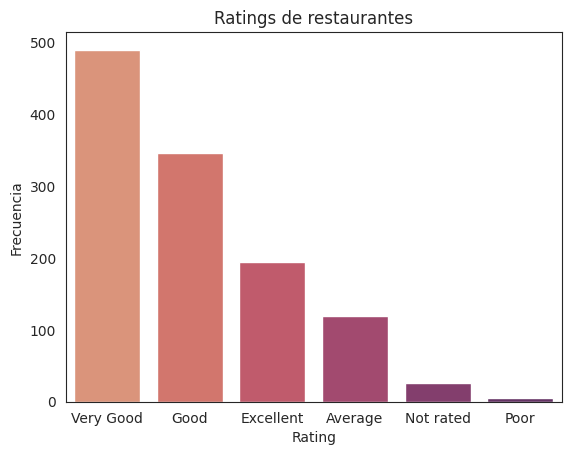

In [147]:
g= sns.countplot(data=df,
                  x='user_rating',
                  order=df['user_rating'].value_counts().index, # orden
                  palette='flare')
g.set(title='Ratings de restaurantes')
g.set(ylabel='Frecuencia', xlabel='Rating')

Ahora, si queremos que el eje y sean porcentajes en vez de conteos, podemos simplemente transformar nuestra `Serie` `counts` con una simple regla de 3:

In [148]:
counts * 100 / counts.sum()

Very Good    41.525424
Good         29.322034
Excellent    16.440678
Average      10.084746
Not rated     2.203390
Poor          0.423729
Name: user_rating, dtype: float64

In [149]:
as_percentages = pd.DataFrame(counts * 100 / counts.sum())

In [150]:
df1 = as_percentages.reset_index()

In [151]:
df1

,index,user_rating
0,Very Good,41.525424
1,Good,29.322034
2,Excellent,16.440678
3,Average,10.084746
4,Not rated,2.203390
5,Poor,0.423729


In [152]:
conteos = df['user_rating'].value_counts()
conteos = pd.DataFrame(conteos)
conteos = conteos.reset_index()

In [153]:
conteos

,index,user_rating
0,Very Good,490
1,Good,346
2,Excellent,194
3,Average,119
4,Not rated,26
5,Poor,5


[Text(0.5, 1.0, 'Gráfica de barras'),
 Text(0, 0.5, 'Rating de usuarios'),
 Text(0.5, 0, 'Frecuencia')]

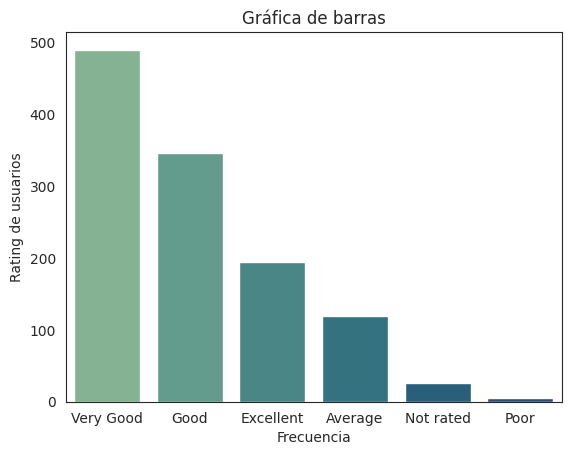

In [154]:
g = sns.barplot(conteos, y='user_rating', x='index', palette='crest')
g.set(title= "Gráfica de barras", ylabel='Rating de usuarios', xlabel = 'Frecuencia')

In [155]:
porcentaje = df['user_rating'].value_counts(normalize=True) *100
porcentaje = pd.DataFrame(porcentaje)
porcentaje = porcentaje.reset_index()
porcentaje.head()

,index,user_rating
0,Very Good,41.525424
1,Good,29.322034
2,Excellent,16.440678
3,Average,10.084746
4,Not rated,2.203390


[Text(0.5, 1.0, 'Gráfica de barras'),
 Text(0, 0.5, 'Rating de usuarios'),
 Text(0.5, 0, 'Porcentajes')]

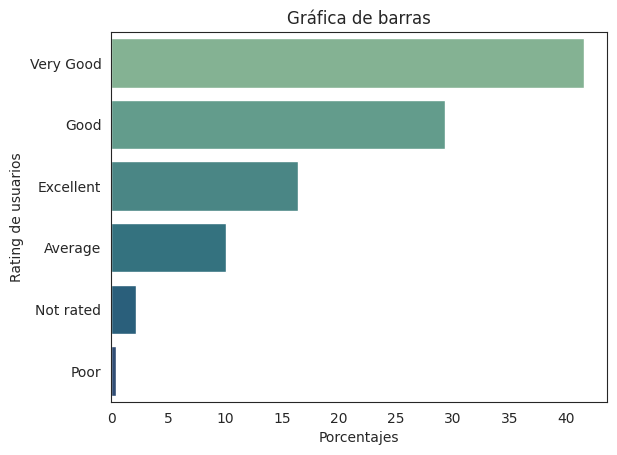

In [159]:
g = sns.barplot(data=porcentaje, x="user_rating", y= "index", palette = 'crest')
g.set(title= "Gráfica de barras", ylabel='Rating de usuarios', xlabel = 'Porcentajes')

[Text(0.5, 0, 'Frecuencias'), Text(0, 0.5, 'Ratings')]

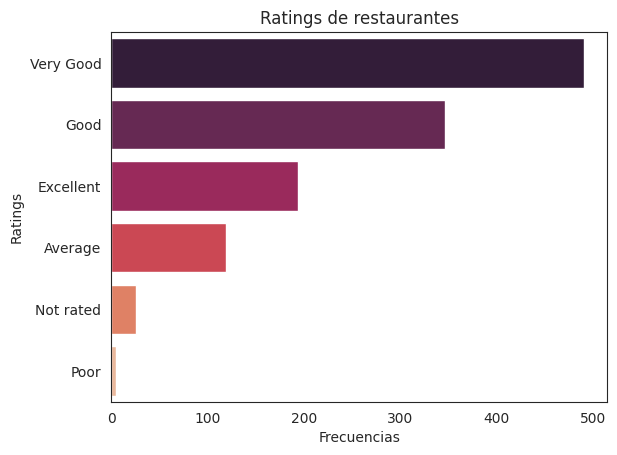

In [157]:
g = sns.countplot(data=df,
                  y='user_rating',
                  order=df['user_rating'].value_counts().index, # orden
                  palette='rocket'
                  ) #si es horizontal o vertical
g.set(title='Ratings de restaurantes')
g.set(xlabel='Frecuencias', ylabel='Ratings')

Si quieres acomodar los nombres de tus tics en el eje x, puedes utilizar el siguiente código para cambiarles la rotación:

En este caso no había mucha necesidad de rotar los nombres, pero hay veces que rotar los nombres y/o cambiar el tamaño de la gráfica es la única manera de hacerlos comprensibles.

---

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera `orient='h'` y cambiando el orden de nuestros inputs:

#### La Moda

La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de `value_counts` o de la gráfica de barras, pero `pandas` también ofrece un método para obtenerla fácilmente:

In [158]:
df['user_rating'].mode()

0    Very Good
Name: user_rating, dtype: object